# Taylor-Entwicklung

In [1]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy

Mittels der [Taylor-Entwicklung](https://de.wikipedia.org/wiki/Taylorreihe) kann jede beliebig oft stetig differenzierbare Funktion $\sf f(x)$ um einem Entwicklungspunkt $\sf x_0$ beliebig genau angenähert werden. Die funktionale Abhängigkeit bezieht sich nun auf die Variable $\sf h$, welche nur in direkter Umgebung um $\sf x_0$ betrachtet wird. Die Taylor-Entwicklung lautet:

$$ \sf f(x_0 + h) = \sum_{i=0}^{\infty}\frac{1}{i!}f^{(i)}(x_0)\cdot h^i $$
$$ \sf = f(x_0) + f'(x_0)\cdot h + \frac{1}{2} f''(x_0)\cdot h^2 + \frac{1}{6}f'''(x_0)\cdot h^3 + \cdots $$

Diese Entwicklung kann auch nur bis zu einer vorgegebenen Ordnung betrachtet werden. So nimmt die Entwicklung bis zur Ordnung $\sf \mathcal{O}(h^3)$ folgende Form an:

$$\sf f(x_0 + h) = f(x_0) + f'(x_0)\cdot h + \frac{1}{2} f''(x_0)\cdot h^2 + \mathcal{O}(h^3) $$


Hierbei deutet das Landau-Symbol $\sf \mathcal{O}$ die Ordnung an, welche die vernachlässigten Terme, hier ab $\sf h^3$, als Approximationsfehler zusammenfasst. Die Ordnung gibt an wie schnell bzw. mit welchem funktionalem Zusammenhang der Approximationsfehler gegen Null läuft für $\sf h \rightarrow 0$.

Eine graphische Darstellung der ersten Elemente der Reihe verdeutlichen nochmals die Grundidee. Das folgende Beispiel entwickelt die Funktion

$$ \sf f(x) = \sin(3x) + 2x $$

am Punkt $\sf x_0=0.85$.

In [2]:
def fkt(x, p=0):
    if p==0:
        return np.sin(3*x) + 2*x
    if p==1:
        return 3*np.cos(3*x) + 2
    if p==2:
        return -9*np.sin(3*x)
    if p==3:
        return -27*np.cos(3*x)
    return None

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x, p=0)

In [3]:
x0 = 0.85

# Taylor-Elemente
te = []
te.append(0*(x-x0) + fkt(x0, p=0))
te.append((x-x0) * fkt(x0, p=1))
te.append((x-x0)**2 * fkt(x0, p=2) * 1/2)
te.append((x-x0)**3 * fkt(x0, p=3) * 1/6)

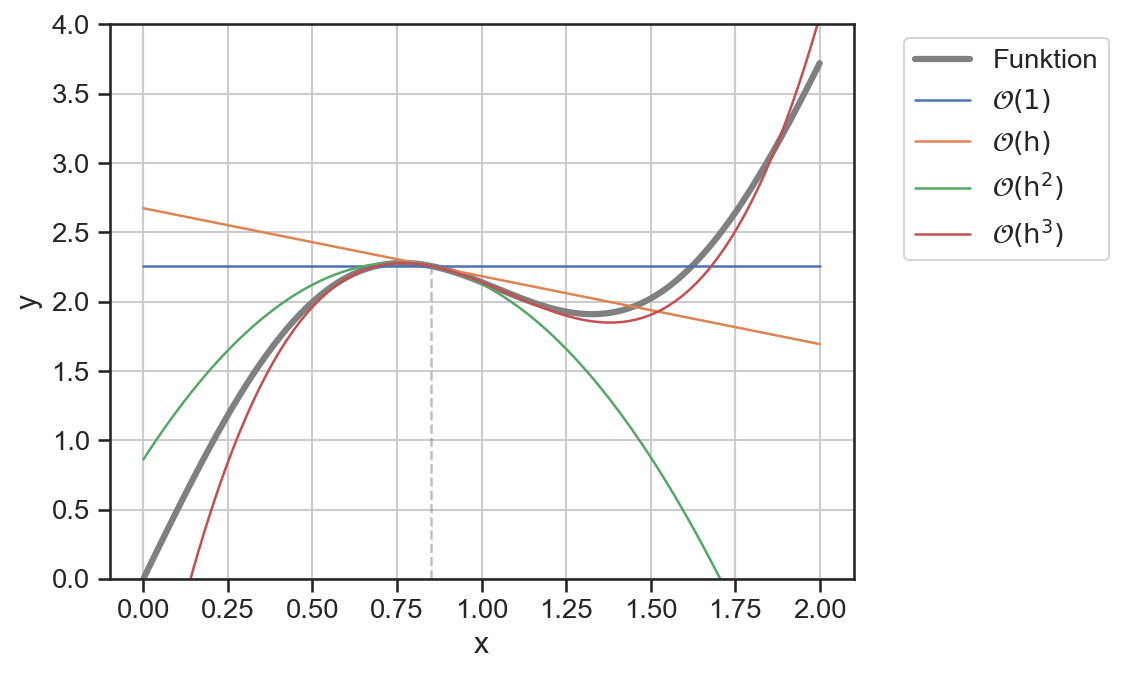

In [4]:
plt.plot(x, y, color='Grey', lw=3, label="Funktion")
plt.plot(x, te[0], label="$\sf\mathcal{O}(1)$")
plt.plot(x, te[0] + te[1], label="$\sf\mathcal{O}(h)$")
plt.plot(x, te[0] + te[1] + te[2], label="$\sf\mathcal{O}(h^2)$")
plt.plot(x, te[0] + te[1] + te[2] + te[3], label="$\sf\mathcal{O}(h^3)$")

plt.vlines(x0, ymin=0, ymax=fkt(x0), color='Grey', ls='--', alpha=0.5)

plt.ylim([0,4])

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y');